<a href="https://colab.research.google.com/github/tech-dhawal-03/Data-Mining-Projects/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from math import log2

In [3]:
# --- 1. Sample Dataset ---
data = {'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
        'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
        'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']}
df = pd.DataFrame(data)
df.head()

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes


In [4]:
df.describe()

,Outlook,Temperature,Humidity,Windy,PlayTennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,False,Yes
freq,5,6,7,8,9


In [9]:
print("Columns in DataFrame before get_dummies:", df.columns)

Columns in DataFrame before get_dummies: Index(['PlayTennis', 'Outlook_Rainy', 'Outlook_Sunny', 'Temperature_Hot',
       'Temperature_Mild', 'Humidity_Normal', 'Windy_True'],
      dtype='object')


In [10]:
# Separate features (X) and target (y)
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# --- 3. Decision Tree Classifier with Gini Index ---
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree.fit(X_train, y_train)
gini_y_pred = gini_tree.predict(X_test)

In [13]:
# --- 4. Evaluation of Gini-based Tree ---
print("\n--- Evaluation of Decision Tree with Gini Index ---")
print("Accuracy:", accuracy_score(y_test, gini_y_pred))
print("\nClassification Report:\n", classification_report(y_test, gini_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gini_y_pred))


--- Evaluation of Decision Tree with Gini Index ---
Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5


Confusion Matrix:
 [[1 1]
 [1 2]]


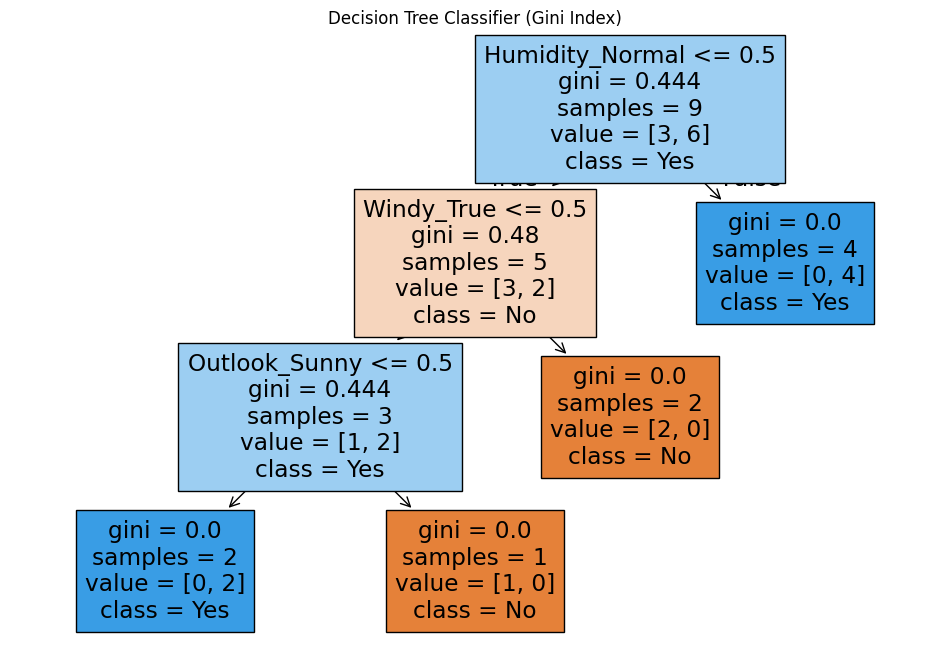

In [14]:
# --- 5. Visualization of Gini-based Tree ---
plt.figure(figsize=(12, 8))
plot_tree(gini_tree, feature_names=X.columns, class_names=gini_tree.classes_, filled=True)
plt.title("Decision Tree Classifier (Gini Index)")
plt.show()

In [15]:
# --- 6. Comparison with ID3 (Conceptual and Manual Calculation of Information Gain) ---

print("\n--- Conceptual Comparison with ID3 (Information Gain) ---")
print("ID3 algorithm primarily uses Information Gain as the splitting criterion.")
print("The structure of the tree built using Gini Index and Information Gain often tends to be similar, especially for datasets with categorical features.")
print("However, the choice of splitting criterion can sometimes lead to different tree structures.")
print("   - Gini Index favors splits that result in larger partitions of the same class.")
print("   - Information Gain (based on Entropy) favors splits that result in more balanced partitions with higher purity.")


--- Conceptual Comparison with ID3 (Information Gain) ---
ID3 algorithm primarily uses Information Gain as the splitting criterion.
The structure of the tree built using Gini Index and Information Gain often tends to be similar, especially for datasets with categorical features.
However, the choice of splitting criterion can sometimes lead to different tree structures.
   - Gini Index favors splits that result in larger partitions of the same class.
   - Information Gain (based on Entropy) favors splits that result in more balanced partitions with higher purity.


In [18]:
#  --- 7. Manual Calculation of Information Gain for the Root Node (Illustrative) ---

def entropy(probabilities):
    return -sum(p * log2(p) for p in probabilities if p > 0)

def information_gain(data, target, attribute):
    total_entropy = entropy(data[target].value_counts(normalize=True))
    weighted_entropy = 0
    for value in data[attribute].unique():
        subset = data[data[attribute] == value]
        subset_entropy = entropy(subset[target].value_counts(normalize=True))
        weighted_entropy += (len(subset) / len(data)) * subset_entropy
    return total_entropy - weighted_entropy

print("\n--- Illustrative Information Gain Calculation for Root Node ---")
df_original = pd.DataFrame(data) # Using original categorical data for IG calculation

# Calculate Information Gain for each attribute at the root node
target_attribute = 'PlayTennis'
for attribute in df_original.columns.drop(target_attribute):
    ig = information_gain(df_original, target_attribute, attribute)
    print(f"Information Gain ({attribute}): {ig:.4f}")

print("\nBased on Information Gain, the attribute with the highest gain would be chosen as the root node by ID3.")




--- Illustrative Information Gain Calculation for Root Node ---
Information Gain (Outlook): 0.2467
Information Gain (Temperature): 0.0292
Information Gain (Humidity): 0.1518
Information Gain (Windy): 0.0481

Based on Information Gain, the attribute with the highest gain would be chosen as the root node by ID3.
